In [128]:
import pandas as pd
import MySQLdb
import numpy as np
from sqlalchemy import create_engine
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

In [129]:
# DB Connection
myvars = {}
with open("../risaac-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

In [130]:
myvars['DB databasename'] = 'I501saptpurkFall22grp_06_db'

In [131]:
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db=myvars['DB databasename'])
cursor = conn.cursor()

In [132]:
df_p_huq = pd.read_sql('select * from P_HUQ', conn)

/usr/local/lib/python3.10/dist-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [133]:
df_p_demo = pd.read_sql('select * from P_DEMO_preprocess', conn)

/usr/local/lib/python3.10/dist-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [134]:
df_p_huq_demo = df_p_huq.merge(df_p_demo, on = ["SEQN"], how = "left", validate = "1:1")

In [135]:
df_p_huq

,huq_key,SEQN,HUQ010,HUQ030,HUQ051,HUD062,HUQ071,HUQ090
0,0,109263,1,1,1,NaN,2,NaN
1,1,109264,2,1,0,2.0,2,1.0
2,2,109265,1,1,2,NaN,2,NaN
3,3,109266,3,1,1,NaN,2,2.0
4,4,109267,1,2,1,NaN,2,2.0
...,...,...,...,...,...,...,...,...
15555,15555,124818,2,1,1,NaN,2,2.0
15556,15556,124819,3,1,5,NaN,2,NaN
15557,15557,124820,1,1,2,NaN,2,2.0
15558,15558,124821,3,1,2,NaN,2,2.0


In [136]:
df_p_huq.isna().sum()

huq_key        0
SEQN           0
HUQ010         0
HUQ030         0
HUQ051         0
HUD062     13540
HUQ071         0
HUQ090      1724
dtype: int64

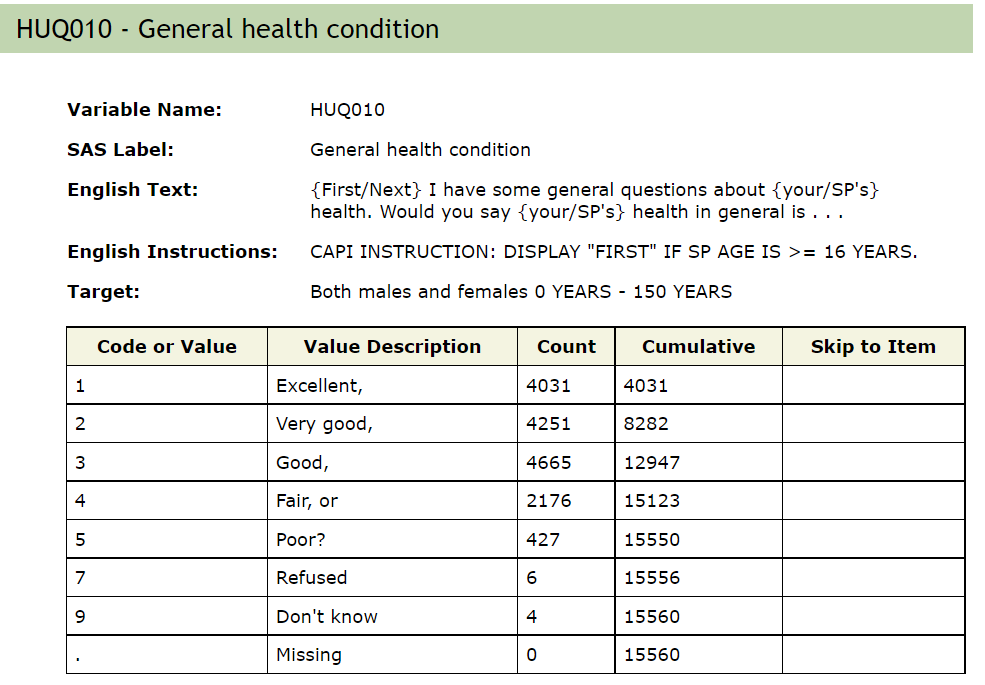

In [137]:
# classes 7,9 provide no information and can be considered nulls
df_p_huq.loc[df_p_huq["HUQ010"].isin([7,9]), "HUQ010"] = np.nan

In [138]:
df_p_huq.isna().sum()

huq_key        0
SEQN           0
HUQ010        10
HUQ030         0
HUQ051         0
HUD062     13540
HUQ071         0
HUQ090      1724
dtype: int64

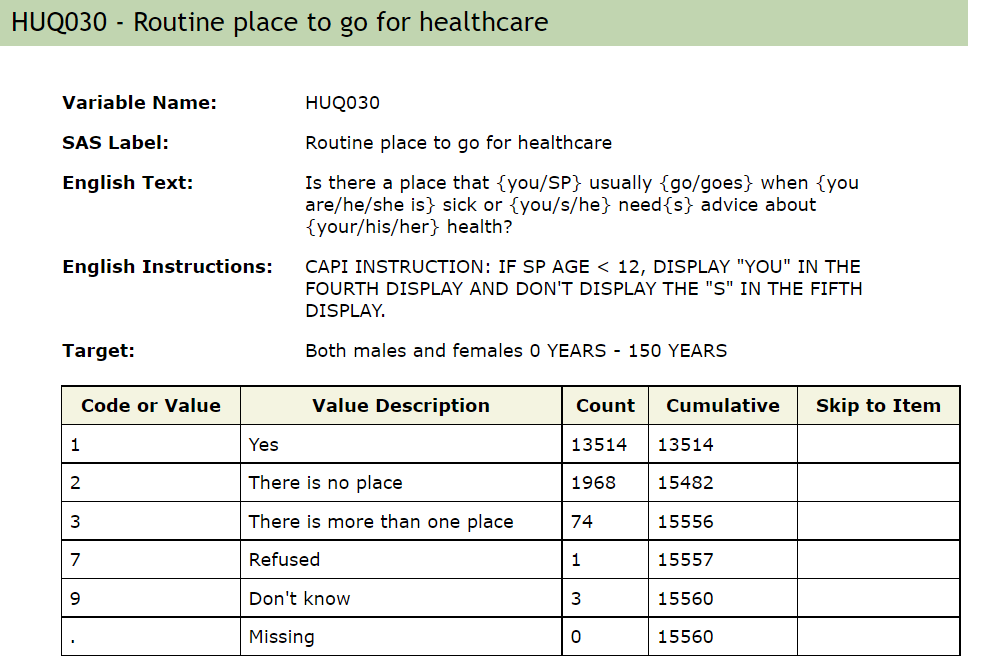

In [139]:
# classes 7,9 provide no information and can be considered nulls
df_p_huq.loc[df_p_huq["HUQ030"].isin([7,9]), "HUQ030"] = np.nan

In [140]:
df_p_huq.isna().sum()

huq_key        0
SEQN           0
HUQ010        10
HUQ030         4
HUQ051         0
HUD062     13540
HUQ071         0
HUQ090      1724
dtype: int64

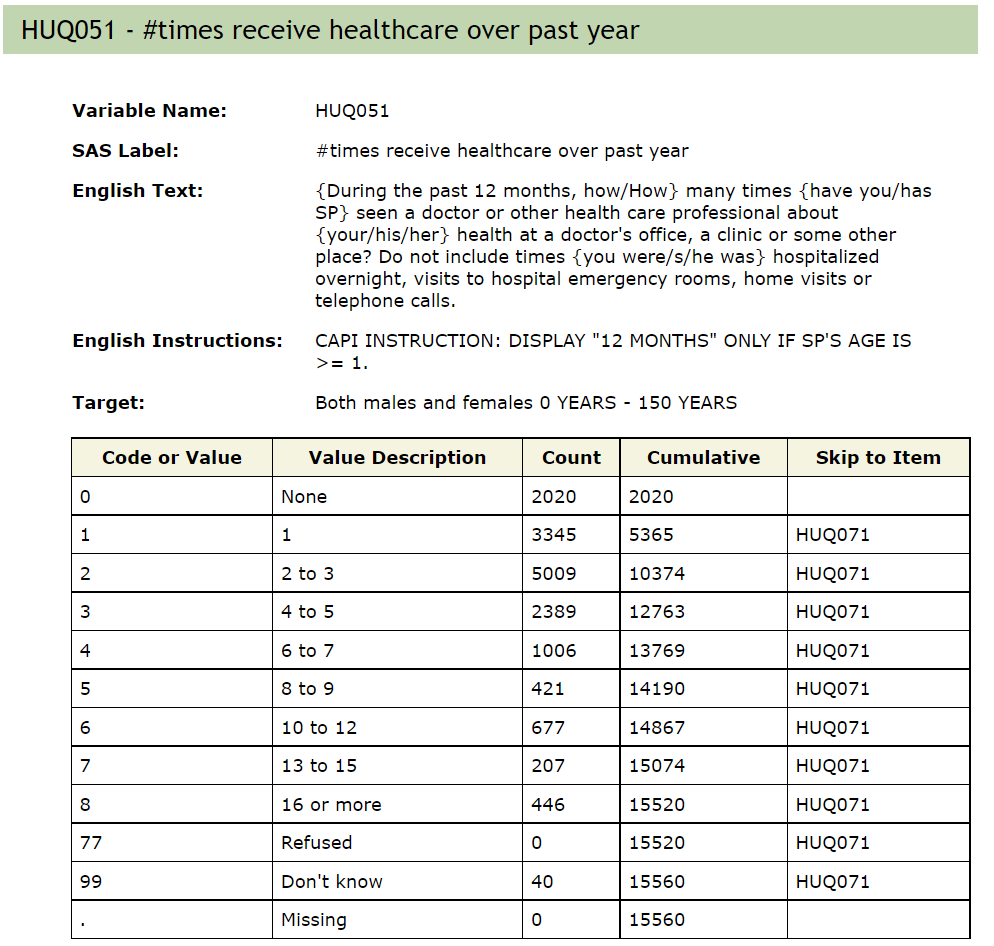

In [141]:
# classes 77,99 provide no information and can be considered nulls
df_p_huq.loc[df_p_huq["HUQ051"].isin([77,99]), "HUQ051"] = np.nan

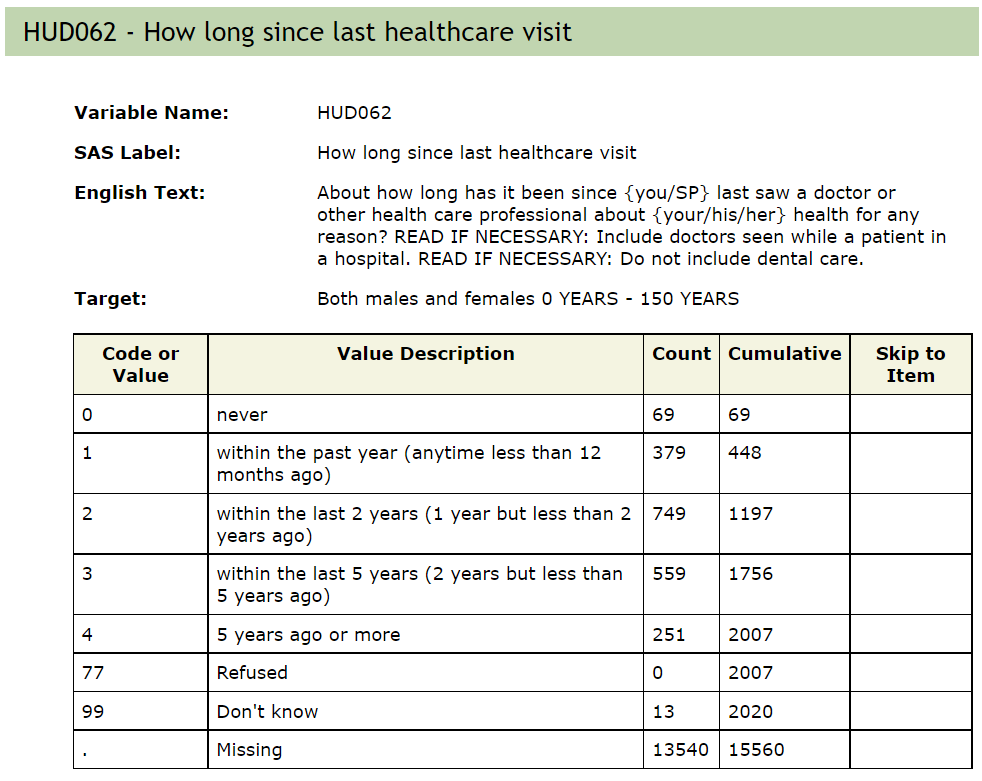

In [142]:
# the column is contradictory with column HUQ051 (times received healthcare over past year)
# HUQ051 covers all respondents who have had healthcare over past year except few who did not take
# healthcare within the past year. HUD062 is contradictory
# as it shows respondents data with last visit to healthcare to be around 379 for within a year

In [143]:
# we will drop the column due to issues that we see as reasoned above
df_p_huq = df_p_huq.drop("HUD062", axis = 1)

In [144]:
df_p_huq.isna().sum()

huq_key       0
SEQN          0
HUQ010       10
HUQ030        4
HUQ051       40
HUQ071        0
HUQ090     1724
dtype: int64

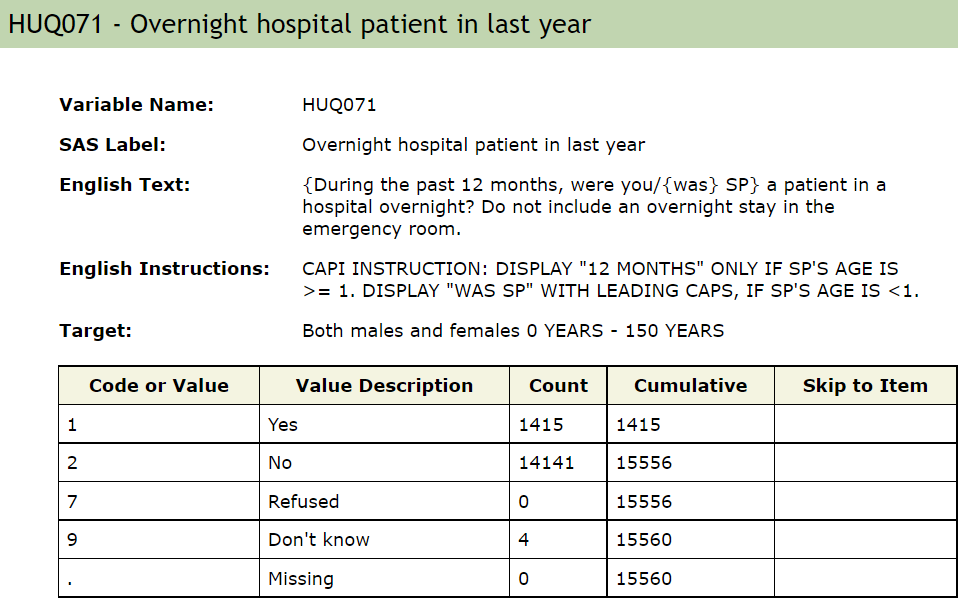

In [145]:
# classes 7,9 provide no information and can be considered nulls
df_p_huq.loc[df_p_huq["HUQ071"].isin([7,9]), "HUQ071"] = np.nan

In [146]:
df_p_huq.isna().sum()

huq_key       0
SEQN          0
HUQ010       10
HUQ030        4
HUQ051       40
HUQ071        4
HUQ090     1724
dtype: int64

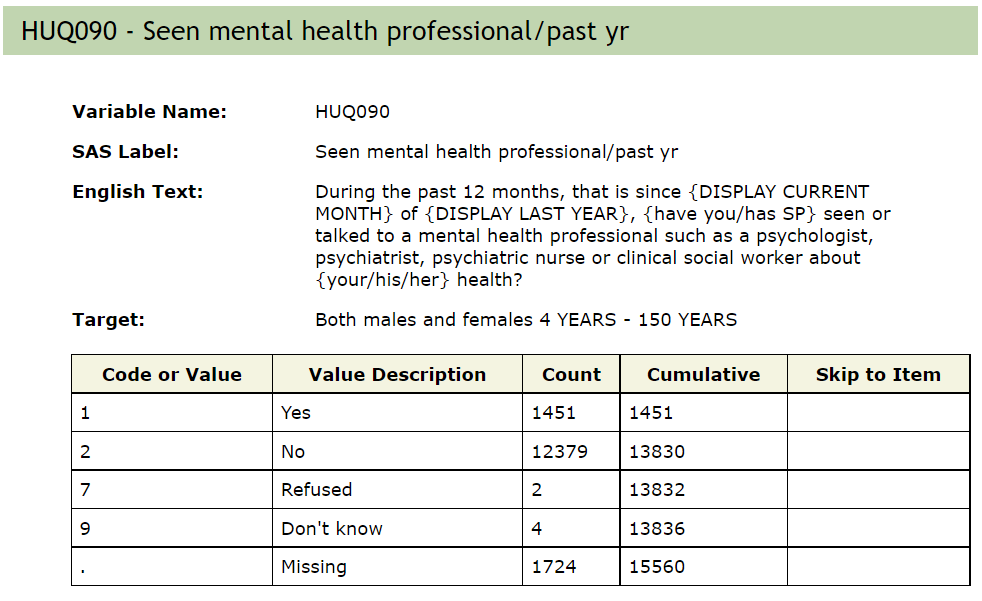

In [147]:
# check patterns for missing data in the column
df_p_huq[df_p_huq["HUQ090"].isna()]

,huq_key,SEQN,HUQ010,HUQ030,HUQ051,HUQ071,HUQ090
0,0,109263,1.0,1.0,1.0,2.0,NaN
2,2,109265,1.0,1.0,2.0,2.0,NaN
6,6,109269,1.0,1.0,4.0,2.0,NaN
9,9,109272,1.0,1.0,2.0,1.0,NaN
13,13,109276,1.0,1.0,2.0,2.0,NaN
...,...,...,...,...,...,...,...
15537,15537,124800,1.0,1.0,4.0,2.0,NaN
15538,15538,124801,3.0,1.0,2.0,2.0,NaN
15541,15541,124804,1.0,1.0,2.0,2.0,NaN
15553,15553,124816,1.0,1.0,5.0,2.0,NaN


In [148]:
# check ages for respondents whose data is missing
df_p_huq_demo[["HUQ090", "RIDAGEYR"]][df_p_huq_demo["HUQ090"].isna()]["RIDAGEYR"].value_counts()

0.0    573
2.0    431
1.0    406
3.0    311
4.0      1
Name: RIDAGEYR, dtype: int64

In [149]:
# check total missing values
df_p_huq_demo[df_p_huq_demo["RIDAGEYR"] <= 4]['RIDAGEYR'].value_counts()

# we see it is missing completely for respondents aged <= 3 and 1 data point missing for age 4

0.0    573
2.0    431
1.0    406
3.0    311
4.0    302
Name: RIDAGEYR, dtype: int64

In [150]:
# we assume respondents of lower age generally dont see psychiatrists, lets check
df_p_huq_demo[df_p_huq_demo["HUQ090"] == 1].sort_values("RIDAGEYR").groupby("RIDAGEYR")["HUQ090"].count()

# we see respondents of age 4 to have only 2 yes values. We can impute for ages <= 4 with 2

RIDAGEYR
4.0      2
5.0     17
6.0     21
7.0     23
8.0     32
9.0     38
10.0    44
11.0    47
12.0    35
13.0    36
14.0    36
15.0    41
16.0    34
17.0    38
18.0    30
19.0    24
20.0    10
21.0    12
22.0    22
23.0    28
24.0    13
25.0    16
26.0    15
27.0    10
28.0    21
29.0    19
30.0    17
31.0    19
32.0    26
33.0    20
34.0    22
35.0    16
36.0    15
37.0    17
38.0    13
39.0    13
40.0    15
41.0    16
42.0    17
43.0    17
44.0    21
45.0    23
46.0    11
47.0    23
48.0    19
49.0    19
50.0    15
51.0    17
52.0    14
53.0    15
54.0    21
55.0    27
56.0     9
57.0    17
58.0    10
59.0    19
60.0    23
61.0    20
62.0    22
63.0    20
64.0    11
65.0    14
66.0    14
67.0     8
68.0     9
69.0    10
70.0    11
71.0    11
72.0     8
73.0     6
74.0     7
75.0     4
76.0     5
77.0     6
78.0     2
79.0     3
80.0    41
Name: HUQ090, dtype: int64

In [151]:
df_p_huq["HUQ090"] = df_p_huq["HUQ090"].replace(np.nan, 2)

In [152]:
my_conn = create_engine(f"mysql+mysqldb://{myvars['DB username']}:{myvars['DB password']}@localhost/{myvars['DB databasename']}") #fill details

In [153]:
cols = ['SEQN'
        ,'HUQ010'
        ,'HUQ030'
        ,'HUQ071'
        ,'HUQ090'
       ]

for col in cols:
    if col in df_p_huq.columns:
        df_p_huq[col] = df_p_huq[col].astype("Int32")

In [154]:
cols = ['HUQ051'
       ,'HUD062']

for col in cols:
    if col in df_p_huq.columns:
        df_p_huq[col] = df_p_huq[col].astype("Int32")

In [155]:
name = "P_HUQ_preprocess"
df_p_huq.to_sql(name, con = my_conn, if_exists = 'replace', index = False)

15560